## Class 12

This notebook references these specific sections:

Ch 7 "Graphs and Graphing Algorithms" in Data Structures in Python (DSP):

https://runestone.academy/ns/books/published/pythonds3/BasicDS/toctree.html?mode=browsing


This notebook by:

***Eric V. Level***  

Graduate Programs in Software Engineering and Data Science  
University of St Thomas
St Paul, MN

Includes material our primary online site...:

- ***Problem Solving with Algorithms and Data Structures using Python***   
by Brad Miller and David Ranum  
Luther College 
(DSP for short)

https://runestone.academy/ns/books/published/pythonds3/index.html?mode=browsing

...along with material from this secondary source.

- ***How to Think Like a Computer Scientist in Python***   
by Brad Miller and David Ranum  
Luther College 
(HTT for short)

https://runestone.academy/ns/books/published/thinkcspy/index.html#

### DSP-7.1: Chapter Objectives

- To learn what a graph is and how it is used.

- To implement the **`graph`** abstract data type using multiple internal representations.

- To see how graphs can be used to solve a wide variety of problems.

In this chapter we will study **graphs**. Graphs are a more general structure than the trees we studied in the last chapter; in fact, you can think of a tree as a special kind of graph. Graphs can be used to represent many interesting things about our world, including systems of roads, airline flights from city to city, how the internet is connected, or even the sequence of classes you must take to complete a major in computer science. We will see in this chapter that once we have a good representation for a problem, we can use some standard graph algorithms to solve what otherwise might seem to be a very difficult problem.

While it is relatively easy for humans to look at a road map and understand the relationships between different places, a computer has no such knowledge. However, we can also think of a road map as a graph. When we do so we can have our computer do interesting things for us. If you have ever used one of the internet map sites, you know that a computer can find the shortest, quickest, or easiest path from one place to another.

As a student of computer science you may wonder about the courses you must take for your major. A graph is good way to represent the prerequisites and other interdependencies among courses. Figure 1 shows such a graph. It represents the courses and the order in which they must be taken to complete a major in computer science at Luther College.


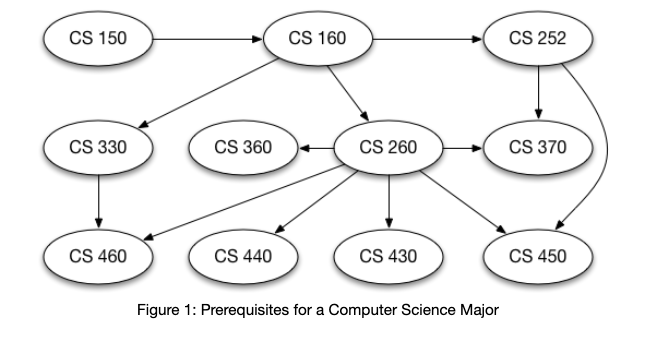

### DSP-7.2:  Vocabulary and Definitions

Now that we have looked at an graph, we will more formally define a graph and its components. We already know some of these terms from our discussion of trees.

**Vertex**

A **vertex** (also called a ***node***) is a fundamental part of a graph. It can have a name, which we will call the ***key***. A vertex may also have additional information. We will call this additional information the ***value*** or the ***payload***.

**Edge**

An **edge** (also called an ***arc***) is another fundamental part of a graph. An edge connects two vertices to show that there is a relationship between them. Edges may be one-way or two-way. If the edges in a graph are all one-way, we say that the graph is a **directed graph**, or a **digraph**. The class prerequisites graph shown above is clearly a digraph since you must take some classes before others.

**Weight**

Edges may be **weighted** to show that there is a cost to go from one vertex to another, which we call **edge cost**. For example, in a graph of roads that connect one city to another, the weight on the edge might represent the distance between the two cities.

With those definitions in hand, we can formally define a graph. A graph can be represented by `G` where `G = (V,E)`. For the graph `G`, `V` is a set of vertices and `E` is a set of edges. Each edge is a tuple `(v,w)` where `v, w in V`. We can add a third component to the edge tuple to represent a weight. A subgraph `s` is a set of edges `e` and vertices `v` such that `e in E` and `v in V`.

Figure 2 shows another example of a simple weighted digraph. Formally we can represent this graph as the set of six vertices:

`V = {v0,v1,v2,v3,v4,v5}`

and the set of nine edges:

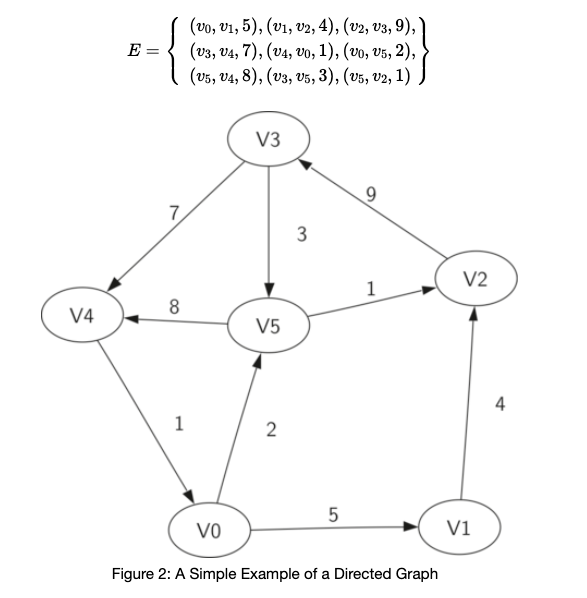

The example graph in Figure 2 helps illustrate two other key graph terms:

**Path**

A **path** in a graph is a sequence of vertices that are connected by edges. Formally we would define a path as `w1, w2,...wn` such that `(wi,wi+1) in E` for all `i <= i <= n-1`. The unweighted path length is the number of edges in the path, specifically `n-1`. The weighted path length is the sum of the weights of all the edges in the path. For example in Figure 2 the path from `v3` to `v1` is the sequence of vertices `(v3,v4,v0,v1)`. The edges are
`{(v3,v4,7),(v4,v0,1),(v0,v1,5)}`.

**Cycle**

A **cycle** in a directed graph is a path that starts and ends at the same vertex. For example, in Figure 2 the path `(v5,v2,v3,v5)` is a cycle. A graph with no cycles is called an ***acyclic graph***. A directed graph with no cycles is called a ***directed acyclic graph*** or a ***DAG***. We will see that we can solve several important problems if the problem can be represented as a DAG.

### DSP-7.3:  The Graph Abstract Data Type

The graph abstract data type is defined as a collection of vertices and edges. Vertices may be either connected to each other or isolated. Edges join two vertices and may be weighted.

- `Graph()` creates a new empty graph.

- `add_vertex(vert)` adds an instance of `Vertex` to the graph.

- `add_edge(from_vert, to_vert)` adds a new directed edge to the graph that connects two vertices.

- `add_edge(from_vert, to_vert, weight)` adds a new weighted directed edge to the graph that connects two vertices.

- `get_vertex(vert_key)` finds the vertex in the graph named `vert_key`.

- `get_vertices()` returns the list of all vertices in the graph.

- `in` returns `True` for a statement of the form `vertex in graph` if the given vertex is in the graph, `False` otherwise.

Now that we have looked at the definition for the graph ADT, there are several ways we can implement it in Python. We will see that there are trade-offs in using different representations to implement the ADT described above. There are two well-known implementations of a graph, the ***adjacency matrix*** and the ***adjacency list***. We will explain both of these options, and then implement one as a Python class.

### DSP-7.4:  Vocabulary and Definitions

One of the easiest ways to implement a graph is to use a two-dimensional matrix. In this matrix implementation, each of the rows and columns represents a vertex in the graph. The value that is stored in the cell at the intersection of row `v` and column `w` indicates if there is an edge from vertex `v` to vertex `w`. When two vertices are connected by an edge, we say that they are **adjacent**. Figure 3 illustrates the adjacency matrix for the graph in Figure 2. The value in each cell represents the weight of the edge from vertex `v` to vertex `w`.

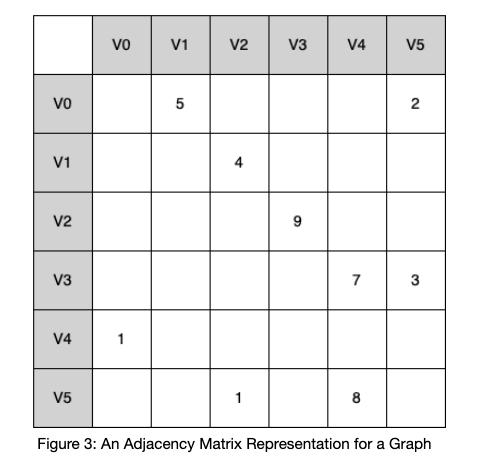

The advantage of the adjacency matrix is that it is simple, and for small graphs it is easy to see which nodes are connected to other nodes. However, otice that most of the cells in the matrix are empty; we can say that this matrix is sparse. A matrix is not a very efficient way to store sparse data. In fact, in Python you must go out of your way to even create a matrix structure like the one in Figure 3.

The adjacency matrix is a good implementation for a graph when the number of edges is large. But what do we mean by large? How many edges would be needed to fill the matrix? Since there is one row and one column for every vertex in the graph, the number of edges required to fill the matrix is `|V|**2`. A matrix is full when every vertex is connected to every other vertex. There are few real problems that approach this sort of connectivity. The problems we will look at in this chapter all involve graphs that are sparsely connected.

### DSP-7.5:  An Adjacency List

A more space-efficient way to implement a sparsely connected graph is to use an **adjacency list**. In an adjacency list implementation, we keep a master list of all the vertices in the `Graph` object, and each vertex object in the graph maintains a list of the other vertices that it is connected to. In our implementation of the `Vertex` class we will use a dictionary rather than a list, where the dictionary keys are the vertices and the values are the weights. Figure 4 illustrates the adjacency list representation for the graph in Figure 2.

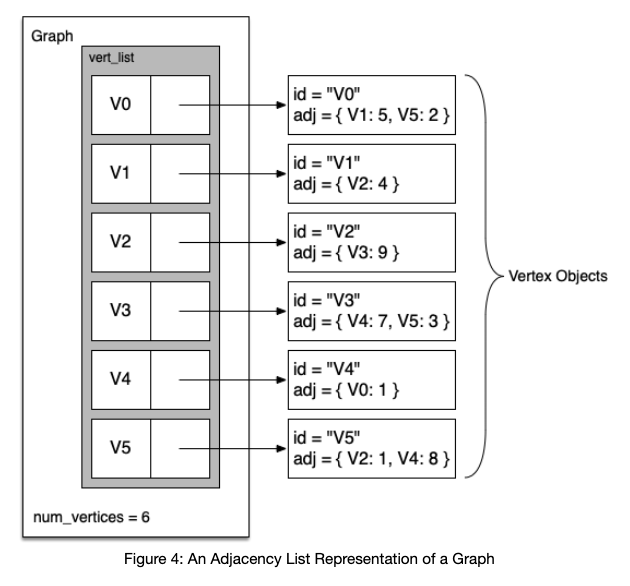

The advantage of the adjacency list implementation is that it allows us to compactly represent a sparse graph. The adjacency list also allows us to easily find all the links that are directly connected to a particular vertex.

### DSP-7.6:  Implementation

Using dictionaries, it is easy to implement the adjacency list in Python. In our implementation of the graph abstract data type we will create two classes: `Vertex`, which will represent each vertex in the graph (see Listing 1) and `Graph`, which holds the master list of vertices (see Listing 2).

Each `Vertex` uses a dictionary to keep track of the vertices to which it is connected and the weight of each edge. This dictionary is called `neighbors`. The listing below shows the code for the `Vertex` class. The constructor simply initializes the `key`, which will typically be a string, and the `neighbors` dictionary. The `set_neighbor` method is used to add a connection from this vertex to another. The `get_neighbors` method returns all of the vertices in the adjacency list, as represented by the `neighbors` instance variable. The `get_neighbor` method returns the weight of the edge from this vertex to the vertex passed as a parameter.

In [1]:
# _dsp_7_6_listing_1.py

class Vertex:
    def __init__(self, key):
        self.key = key
        self.neighbors = {}

    def get_neighbor(self, other):
        return self.neighbors.get(other, None)

    def set_neighbor(self, other, weight=0):
        self.neighbors[other] = weight

    def __repr__(self):
        return f"Vertex({self.key})"

    def __str__(self):
        return (
            str(self.key)
            + " connected to: "
            + str([x.key for x in self.neighbors])
        )

    def get_neighbors(self):
        return self.neighbors.keys()

    def get_key(self):
        return self.key

The `Graph` class, shown in the next listing, contains a dictionary that maps vertex names to vertex objects. In Figure 4 this dictionary object is represented by the shaded gray box. `Graph` also provides methods for adding vertices to a graph and connecting one vertex to another. The `get_vertices` method returns the names of all of the vertices in the graph. In addition, we have implemented the `__iter__` method to make it easy to iterate over all the vertex objects in a particular graph. Together, the two methods allow you to iterate over the vertices in a graph by name, or by the objects themselves.

In [2]:
# _dsp_7_6_listing_2.py

# Vertex defined above...

class Graph:
    def __init__(self):
        self.vertices = {}

    def set_vertex(self, key):
        self.vertices[key] = Vertex(key)

    def get_vertex(self, key):
        return self.vertices.get(key, None)

    def __contains__(self, key):
        return key in self.vertices

    def add_edge(self, from_vert, to_vert, weight=0):
        if from_vert not in self.vertices:
            self.set_vertex(from_vert)
        if to_vert not in self.vertices:
            self.set_vertex(to_vert)
        self.vertices[from_vert].set_neighbor(self.vertices[to_vert], weight)

    def get_vertices(self):
        return self.vertices.keys()

    def __iter__(self):
        return iter(self.vertices.values())

Using the `Graph` and `Vertex` classes just defined, the following Python session creates the graph in Figure 2. First we create six vertices numbered 0 through 5. Then we display the vertex dictionary. Notice that for each key 0 through 5 we have created an instance of a `Vertex`. Next, we add the edges that connect the vertices together. Finally, a nested loop verifies that each edge in the graph is properly stored. You should check the output of the edge list at the end of this session against Figure 2.

In [3]:
g = Graph()

In [4]:
for i in range(6):
    g.set_vertex(i)

g.vertices

{0: Vertex(0),
 1: Vertex(1),
 2: Vertex(2),
 3: Vertex(3),
 4: Vertex(4),
 5: Vertex(5)}

In [5]:
g.add_edge(0, 1, 5)
g.add_edge(0, 5, 2)
g.add_edge(1, 2, 4)
g.add_edge(2, 3, 9)
g.add_edge(3, 4, 7)
g.add_edge(3, 5, 3)
g.add_edge(4, 0, 1)
g.add_edge(5, 4, 8)
g.add_edge(5, 2, 1)

In [6]:
for v in g:
    for w in v.get_neighbors():
        print(f"({v.get_key()}, {w.get_key()})")

(0, 1)
(0, 5)
(1, 2)
(2, 3)
(3, 4)
(3, 5)
(4, 0)
(5, 4)
(5, 2)


### DSP-7.7:  The Word Ladder Problem

To begin our study of graph algorithms let’s consider the following puzzle called a word ladder: transform the word **FOOL** into the word **SAGE**. In a word ladder puzzle you must make the change occur gradually by changing one letter at a time. At each step you must transform one word into another word; you are not allowed to transform a word into a non-word. The word ladder puzzle was invented in 1878 by Lewis Carroll, the author of Alice in Wonderland. The following sequence of words shows one possible solution to the problem posed above.

FOOL
POOL
POLL
POLE
PALE
SALE
SAGE

There are many variations of the word ladder puzzle. For example you might be given a particular number of steps in which to accomplish the transformation, or you might need to use a particular word. In this section we are interested in figuring out the smallest number of transformations needed to turn the starting word into the ending word.

Not surprisingly, since this chapter is on graphs, we can solve this problem using a graph algorithm. Here is an outline of where we are going:

- Represent the relationships between the words as a graph.

- Use the graph algorithm known as breadth-first search to find an efficient path from the starting word to the ending word.

### DSP-7.8:  Building the Word Ladder Graph

Our first problem is to figure out how to turn a large collection of words into a graph. What we would like is to have an edge from one word to another if the two words are only different by a single letter. If we can create such a graph, then any path from one word to another is a solution to the word ladder puzzle. Figure 1 shows a small graph of some words that solve the **FOOL** to **SAGE** word ladder problem. Notice that the graph is an undirected graph and that the edges are unweighted.

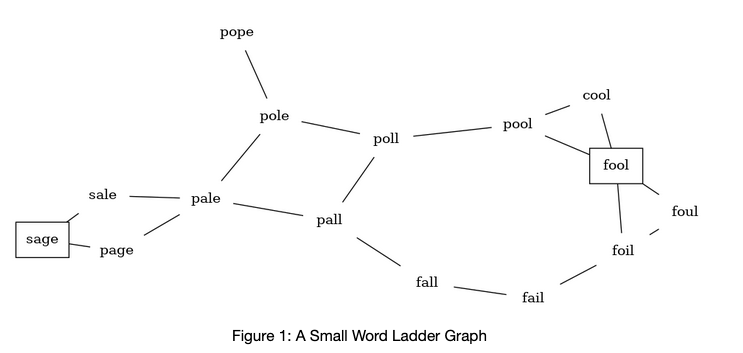

We could use several different approaches to create the graph we need to solve this problem. Let’s start with the assumption that we have a list of words that are all the same length. As a starting point, we can create a vertex in the graph for every word in the list. To figure out how to connect the words, we could compare each word in the list with every other. When we compare we are looking to see how many letters are different. If the two words in question are different by only one letter, we can create an edge between them in the graph. For a small set of words that approach would work fine; however, let’s suppose we have a list of 5,110 words. Roughly speaking, comparing one word to every other word on the list is an `O(n**2)` algorithm. For 5,110 words, `n**2` is more than 26 million comparisons.

We can do much better by using the approach shown in Figure 2. Suppose that we have a number of buckets, each labeled with a four-letter word, except that one of the letters on the label has been replaced by an underscore. As we process a list of words, we compare each word with each bucket using the underscore (`_`) as a wildcard. Every time we find a matching bucket we put the word in that bucket, so that both *POPE* and *POPS* would both go into the *POP_* bucket. Once we have all the words in the appropriate buckets, we know that all the words in each bucket must be connected.

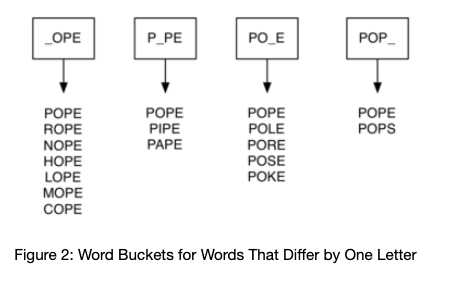

In Python, we can implement the scheme we have just described by using a dictionary. The labels on the buckets we have just described are the keys in our dictionary. The value stored for each key is a list of words. Once we have the dictionary built, we can create the graph. We start our graph by creating a vertex for each word in the graph. Then we create edges between all the vertices we find for words found under the same key in the dictionary. Listing 1 shows the Python code required to build the graph.

In [7]:
# _dsp_7_8_listing_1.py

from pythonds3.graphs import Graph

def build_graph(filename):
    buckets = {}
    the_graph = Graph()
    with open(filename, "r", encoding="utf8") as file_in:
        all_words = file_in.readlines()
    # create buckets of words that differ by 1 letter
    for line in all_words:
        word = line.strip()
        for i, _ in enumerate(word):
            bucket = f"{word[:i]}_{word[i + 1 :]}"
            buckets.setdefault(bucket, set()).add(word)

    # add edges between different words in the same bucket
    for similar_words in buckets.values():
        for word1 in similar_words:
            for word2 in similar_words - {word1}:
                the_graph.add_edge(word1, word2)
    return the_graph

Since this is our first real-world graph problem, you might be wondering how sparse the graph is. The list of four-letter words we have for this problem is 5,110 words long. If we were to use an adjacency matrix, the matrix would have `5110 * 5110 == 26,112,100` cells. The graph constructed by the `build_graph` function has exactly 53,286 edges, so the matrix would have only 0.20% of the cells filled! That is a very sparse matrix indeed

### DSP-7.9:  Implementing Breadth-First Search

With the graph constructed we can now turn our attention to the algorithm we will use to find the shortest solution to the word ladder problem. The graph algorithm we are going to use is called the **breadth-first search (BFS)**, and it is one of the easiest algorithms for searching a graph. It also serves as a prototype for several other important graph algorithms that we will study later.

Given a starting vertex `s` of a graph `G`, a breadth first search proceeds by exploring edges in the graph to find all the vertices in `G` for which there is a path from `s`. The remarkable thing about a breadth-first search is that it finds all the vertices that are a distance `k` from before it finds any vertices that are a distance

. One good way to visualize what the breadth-first search algorithm does is to imagine that it is building a tree, one level of the tree at a time. A breadth first search adds all children of the starting vertex before it begins to discover any of the grandchildren.

To keep track of its progress, BFS colors each of the vertices white, gray, or black. All the vertices are initialized to white when they are constructed. A white vertex is an undiscovered vertex. When a vertex is initially discovered it is colored gray, and when BFS has completely explored a vertex it is colored black. This means that once a vertex is colored black, it has no white vertices adjacent to it. A gray node, on the other hand, may have some white vertices adjacent to it, indicating that there are still additional vertices to explore.

The breadth-first search algorithm shown in Listing 2 below uses the adjacency list graph representation we developed earlier. In addition it uses a `Queue`, a crucial point as we will see, to decide which vertex to explore next.

In [8]:
# _dsp_7_9_listing 2

from pythonds3.basic import Queue
from pythonds3.graphs import Graph

def bfs(start):
    start.distance = 0
    start.previous = None
    vert_queue = Queue()
    vert_queue.enqueue(start)
    while vert_queue.size() > 0:
        current = vert_queue.dequeue()
        for neighbor in current.get_neighbors():
            if neighbor.color == "white":
                neighbor.color = "gray"
                neighbor.distance = current.distance + 1
                neighbor.previous = current
                vert_queue.enqueue(neighbor)
        current.color = "black"

The BFS algorithm uses an extended version of the `Vertex` class that adds three new instance variables: `distance`, `previous`, and `color`. Each of these instance variables also has the appropriate getter and setter methods. The code for this expanded `Vertex` class is included in the `pythonds3` package, but we will not show it to you here as there is nothing new to learn by seeing the additional instance variables.

BFS begins at the starting vertex `start` and paints it gray to show that it is currently being explored. Two other values, the `distance` and the `previous`, are initialized to 0 and `None` respectively for the starting vertex. Finally, `start` is placed on a `Queue`. The next step is to begin to systematically explore vertices at the front of the queue. We explore each new node at the front of the queue by iterating over its adjacency list. As each node on the adjacency list is examined, its color is checked. If it is white, the vertex is unexplored, and four things happen:

1. The new unexplored vertex `neighbor` is colored gray.

2. The predecessor of `neighbor` is set to the current node `current`.

3. The distance to `neighbor` is set to the distance to `current + 1`.

4. `neighbor` is added to the end of a queue. Adding `neighbor` to the end of the queue effectively schedules this node for further exploration, but not until all the other vertices on the adjacency list of `current` have been explored.

Let’s look at how the `bfs` function would construct the breadth-first tree corresponding to the graph in Figure 1. Starting from *FOOL* we take all nodes that are adjacent to *FOOL* and add them to the tree. The adjacent nodes include *POOL*, *FOIL*, *FOUL*, and *COOL*. Each of these nodes are added to the queue of new nodes to expand. Figure 3 shows the state of the in-progress tree along with the queue after this step.

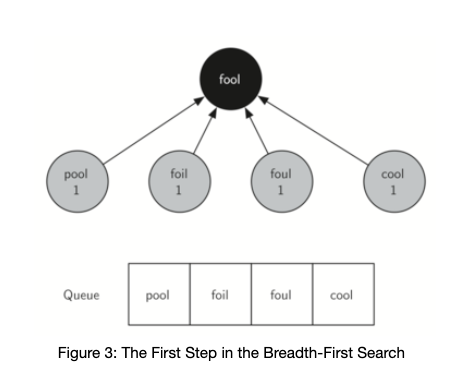

In the next step `bfs` removes the next node (*POOL*) from the front of the queue and repeats the process for all of its adjacent nodes. However, when `bfs` examines the node COOL, it finds that the color of *COOL* has already been changed to gray. This indicates that there is a shorter path to *COOL* and that *COOL* is already on the queue for further expansion. The only new node added to the queue while examining POOL is POLL. The new state of the tree and queue is shown in Figure 4.

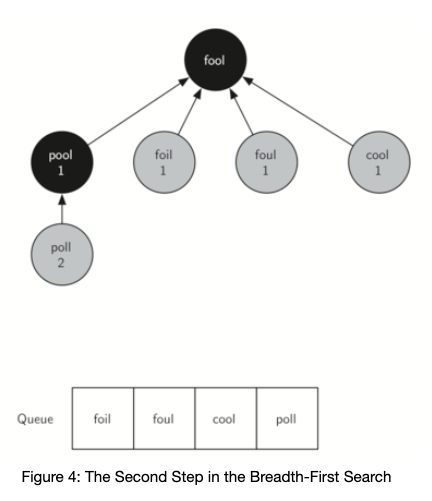

The next vertex on the queue is FOIL. The only new node that FOIL can add to the tree is FAIL. As bfs continues to process the queue, neither of the next two nodes adds anything new to the queue or the tree. Figure 5 shows the tree and the queue after expanding all the vertices on the second level of the tree.

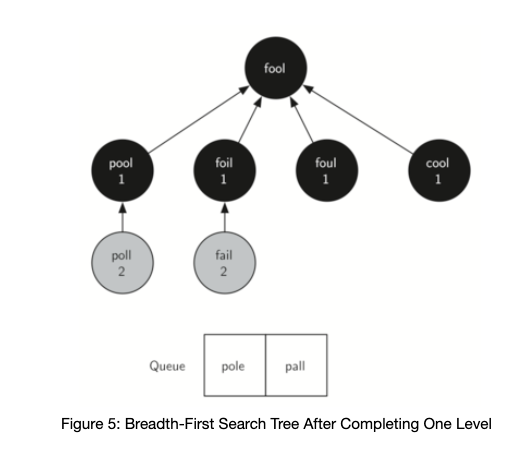

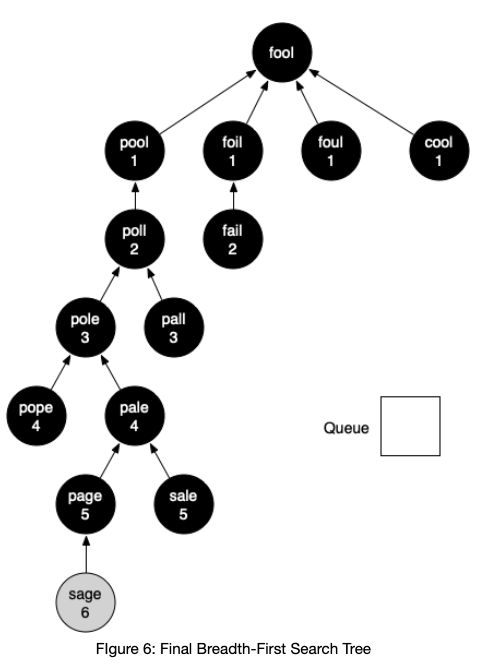

You should continue to work through the algorithm on your own so that you are comfortable with how it works. Figure 6 shows the final breadth-first search tree after all the vertices in Figure 3 have been expanded. The amazing thing about the breadth-first search solution is that we have not only solved the *FOOL–SAGE* problem we started out with, but we have solved many other problems along the way. We can start at any vertex in the breadth-first search tree and follow the predecessor arrows back to the root to find the shortest word ladder from any word back to *FOOL*. The function below (Listing 3) shows how to follow the predecessor links to print out the word ladder.

In [9]:
# _dsp_7_9_listing_3.py

def traverse(starting_vertex):
    current = starting_vertex
    while current:
        print(current.key)
        current = current.previous

traverse(g.get_vertex("sage"))


### DSP-7.10:  Breadth-First Search Analysis

Before we continue with other graph algorithms, let’s analyze the run time performance of the breadth-first search algorithm. The first thing to observe is that the `while` loop is executed, at most, one time for each vertex in the graph (up to `|V|` iterations). You can see that this is true because a vertex must be white before it can be examined and added to the queue. This gives us `O(|V|)` for the `while` loop. The for loop, which is nested inside the while, is executed at most once for each edge in the graph (up to iterations). The reason is that every vertex is dequeued at most once and we examine an edge from node to node only when node is dequeued. This gives us `O(|E|)` for the `for` loop. Combining the two loops gives us `O(|V|+|E|)`.

Of course doing the breadth-first search is only part of the task. Following the links from the starting node to the goal node is the other part of the task. The worst case for this would be if the graph was a single long chain. In this case traversing through all of the vertices would be `O(|V|)`. The normal case is going to be some fraction of `|V|` but we would still write `O(|V|)`.

Finally, at least for this problem, there is the time required to build the initial graph. We leave the analysis of the `build_graph` function as an exercise for you.

### DSP-7.11:  The Knight's Tour Problem

Another classic problem that we can use to illustrate a second common graph algorithm is called the knight’s tour. The knight’s tour puzzle is played on a chess board with a single chess piece, the knight. The object of the puzzle is to find a sequence of moves that allow the knight to visit every square on the board exactly once. One such sequence is called a tour. The knight’s tour puzzle has fascinated chess players, mathematicians, and now, computer scientists, for over a thousand years. The upper bound on the number of possible legal tours for an 8x8 chessboard is known to be `1.305*10**35`  however, there are even more possible dead ends. Clearly this is a problem that requires some real brains, some real computing power, or both.

Although researchers have studied many different algorithms to solve the knight’s tour problem, a graph search is one of the easiest to understand and program. Once again we will solve the problem using two main steps:

- Represent the legal moves of a knight on a chessboard as a graph.

- Use a graph algorithm to find a path of length `rows*(coluumns-1)` where every vertex on the graph is visited exactly once.


### DSP-7.12:  Building the Knight's Tour Graph

To represent the knight’s tour problem as a graph we will use the following two ideas: each square on the chessboard can be represented as a node in the graph and each legal move by the knight can be represented as an edge in the graph. Figure 1 illustrates the legal moves by a knight and the corresponding edges in a graph.

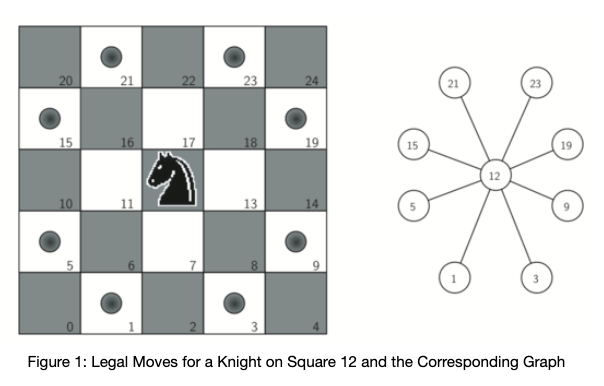

To build the full graph for an n-by-n board, we can use the Python function shown in Listing 1. The knight_graph function makes one pass over the entire board. At each square on the board the knight_graph function calls a helper, gen_legal_moves, to create a list of legal moves for that position on the board. All legal moves are then converted into edges in the graph. Each location on the board is converted into a linear vertex number similar to the vertex numbers shown in Figure 1.

In [10]:
# _dsp_7_12_listing_1.py

from pythonds3.graphs import Graph

def knight_graph(board_size):
    kt_graph = Graph()
    for row in range(board_size):
        for col in range(board_size):
            node_id = row * board_size + col
            new_positions = gen_legal_moves(row, col, board_size)
            for row2, col2 in new_positions:
                other_node_id = row2 * board_size + col2
                kt_graph.add_edge(node_id, other_node_id)
    return kt_graph

The `gen_legal_moves` function (Listing 2) takes the position of the knight on the board and generates each of the eight possible moves, making sure those moves are still within the board.

In [11]:
# _dsp_7_12_listing_2.py

def gen_legal_moves(row, col, board_size):
    new_moves = []
    move_offsets = [
        (-1, -2),  # left-down-down
        (-1, 2),   # left-up-up
        (-2, -1),  # left-left-down
        (-2, 1),   # left-left-up
        (1, -2),   # right-down-down
        (1, 2),    # right-up-up
        (2, -1),   # right-right-down
        (2, 1),    # right-right-up
    ]
    for r_off, c_off in move_offsets:
        if 0 <= row + r_off < board_size and 0 <= col + c_off < board_size:
            new_moves.append((row + r_off, col + c_off))
    return new_moves

Figure 2 shows the complete graph of possible moves on an 8x8 board. There are exactly 336 edges in the graph. Notice that the vertices corresponding to the edges of the board have fewer connections (legal moves) than the vertices in the middle of the board. Once again we can see how sparse the graph is. If the graph was fully connected there would be 4,096 edges. Since there are only 336 edges, the adjacency matrix would be only 8.2 percent full.

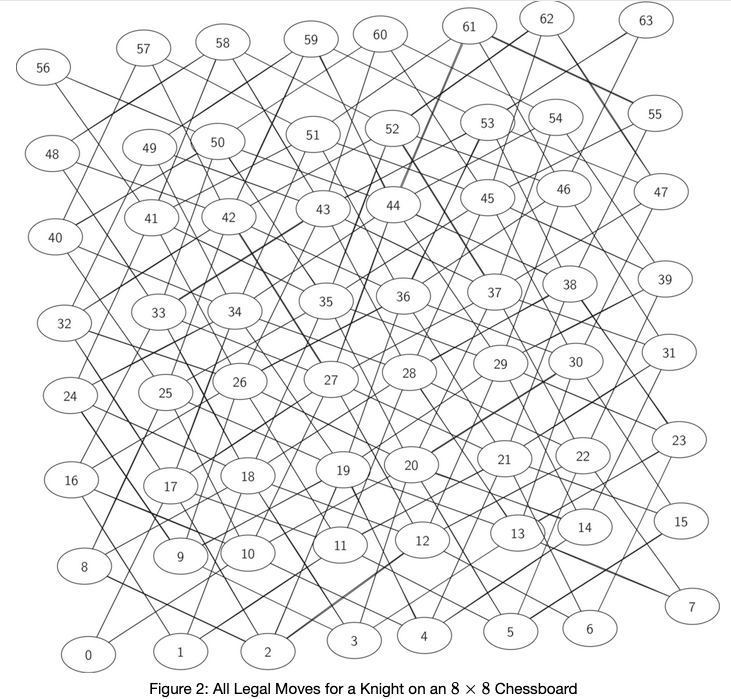

### DSP-7.13:  Implementing Knight's Tour

The search algorithm we will use to solve the knight’s tour problem is called **depth-first search (DFS)**. Whereas the breadth-first search algorithm builds a search tree one level at a time, a depth-first search creates a search tree by exploring one branch of the tree as deeply as possible. In this section we will look at two algorithms that implement a depth-first search. The first algorithm we will look at specifically solves the knight’s tour problem by explicitly forbidding a node to be visited more than once. The second implementation is more general, but allows nodes to be visited more than once as the tree is constructed. The second version is used in subsequent sections to develop additional graph algorithms.

The depth-first exploration of the graph is exactly what we need in order to find a path through 64 vertices (one for each square on the chessboard) and 63 edges. We will see that when the depth-first search algorithm finds a dead end (a place in the graph where there are no more moves possible) it backs up the tree to the next deepest vertex that allows it to make a legal move.

The `knight_tour` function shown in Listing 3 takes four parameters: `n`, the current depth in the search tree; `path`, a list of vertices visited up to this point; `u`, the vertex in the graph we wish to explore; and `limit`, the number of nodes in the path. The `knight_tour` function is recursive. When the `knight_tour` function is called, it first checks the base case condition. If we have a path that contains 64 vertices, we return from `knight_tour` with a status of `True`, indicating that we have found a successful tour. If the path is not long enough, we continue to explore one level deeper by choosing a new vertex to explore and calling `knight_tour` recursively for that vertex.

In [12]:
# _dsp_7_13_listing_3.py

from pythonds3.graphs import Graph


def knight_tour(n, path, u, limit):
    u.color = "gray"
    path.append(u)
    if n < limit:
        neighbors = sorted(list(u.get_neighbors())) # line 6
        done = False
        while i < len(neighbors) and not done:
            if neighbors[i].color == "white": # line 11
                done = knight_tour(n + 1, path, neighbors[i], limit)
            i = i + 1
        if not done:  # prepare to backtrack
            path.pop()
            u.color = "white"
    else:
        done = True
    return done

DFS also uses colors to keep track of which vertices in the graph have been visited. Unvisited vertices are colored white, and visited vertices are colored gray. If all neighbors of a particular vertex have been explored and we have not yet reached our goal length of 64 vertices, we have reached a dead end and must backtrack. Backtracking happens when we return from `knight_tour` with a status of `False`. In the breadth-first search we used a queue to keep track of which vertex to visit next. Since depth-first search is recursive, we are implicitly using a stack to help us with our backtracking. When we return from a call to `knight_tour` with a status of `False`, in line 11, we remain inside the `while` loop and look at the next vertex in `neighbors`.

Let’s look at a simple example of `knight_tour` (Listing 3) in action. You can refer to the figures below to follow the steps of the search. For this example we will assume that the call to the `get_neighbors` method on line 6 orders the nodes in alphabetical order. We begin by calling `knight_tour(0, path, A, 6)`.

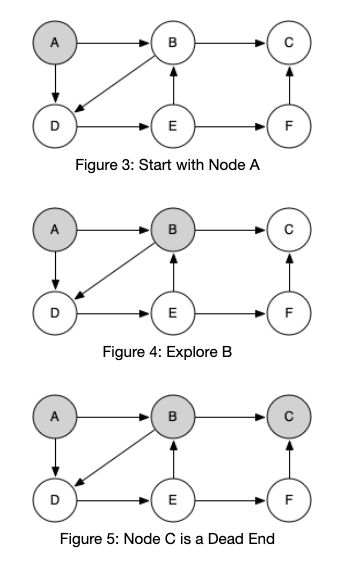

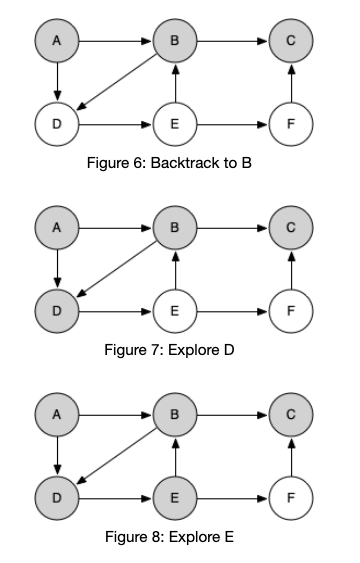

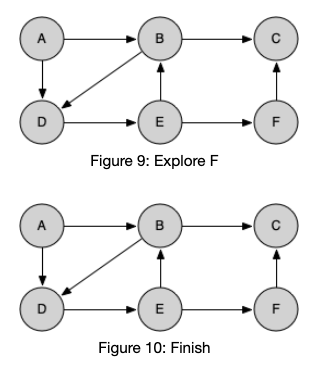

`knight_tour` starts with node A in Figure 3. The nodes adjacent to A are B and D. Since B is before D alphabetically, DFS selects B to expand next as shown in Figure 4. Exploring B happens when `knight_tour` is called recursively. B is adjacent to C and D, so `knight_tour` elects to explore C next. However, as you can see in Figure 5 node C is a dead end with no adjacent white nodes. At this point we change the color of node C back to white. The call to `knight_tour` returns a value of `False`. The return from the recursive call effectively backtracks the search to vertex B (see Figure 6). The next vertex on the list to explore is vertex D, so `knight_tour` makes a recursive call moving to node D (see Figure 7). From vertex D on, `knight_tour` can continue to make recursive calls until we get to node C again (see Figure 8, Figure 9, and Figure 10). However, this time when we get to node C the test `n < limit` fails so we know that we have exhausted all the nodes in the graph. At this point we can return `True` to indicate that we have made a successful tour of the graph. When we return the list, `path` has the values `[A, B, D, E, F, C]`, which is the order we need to traverse the graph to visit each node exactly once.

Figure 11 shows you what a complete tour around an 8x8 board looks like. There are many possible tours; some are symmetric. With some modification you can make circular tours that start and end at the same square.

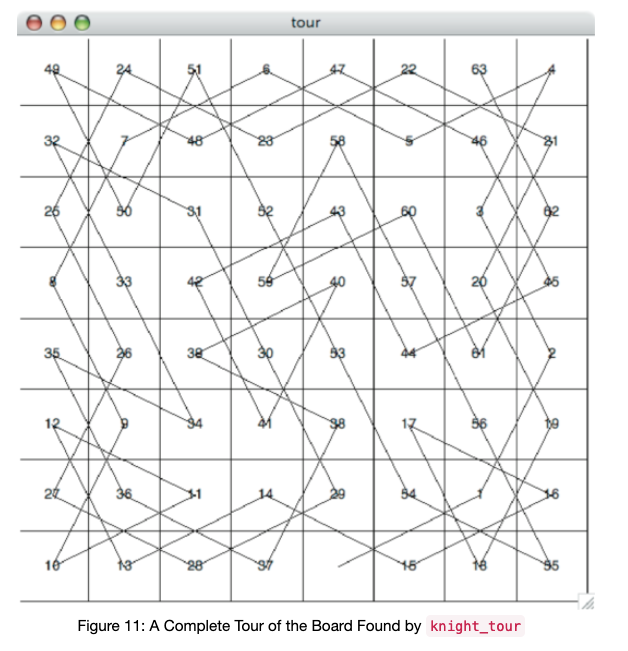

### DSP-7.14:  Knight's Tour Analysis

There is one last interesting topic regarding the knight’s tour problem, then we will move on to the general version of the depth-first search. The topic is performance. In particular, `knight_tour` is very sensitive to the method you use to select the next vertex to visit. For example, on a 5x5 board you can produce a path in about 1.5 seconds on a reasonably fast computer. But what happens if you try an 8x8 board? In this case, depending on the speed of your computer, you may have to wait up to a half hour to get the results! The reason for this is that the knight’s tour problem as we have implemented it so far is an exponential algorithm of size `O(k**N)`, where `N` is the number of squares on the chess board, and `k` is a small constant. Figure 12 can help us visualize why this is so. The root of the tree represents the starting point of the search. From there the algorithm generates and checks each of the possible moves the knight can make. As we have noted before, the number of moves possible depends on the position of the knight on the board. In the corners there are only two legal moves, on the squares adjacent to the corners there are three, and in the middle of the board there are eight. Figure 13 shows the number of moves possible for each position on a board. At the next level of the tree there are once again between two and eight possible next moves from the position we are currently exploring. The number of possible positions to examine corresponds to the number of nodes in the search tree.

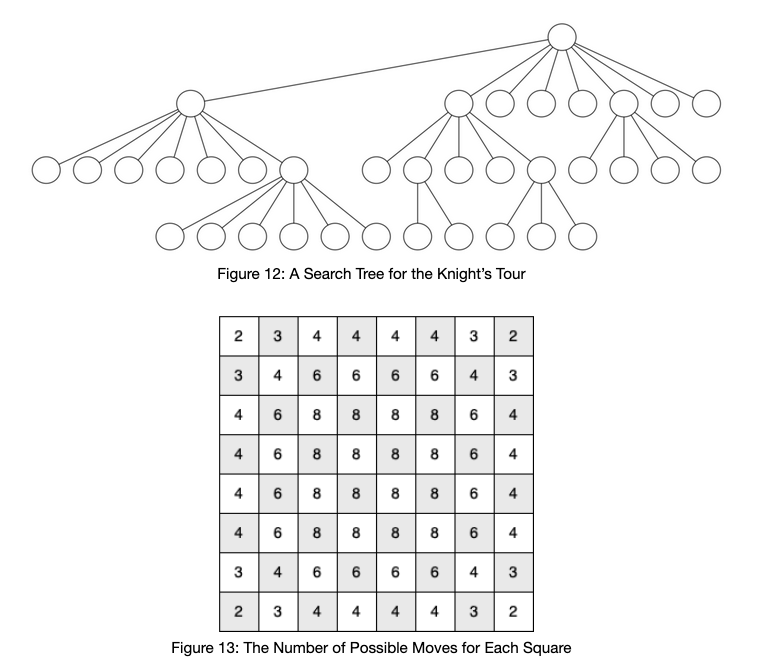

We have already seen that the number of nodes in a binary tree of height `N` is `2**(N+1)-1`. For a tree with nodes that may have up to eight children instead of two, the number of nodes is much larger. Because the branching factor of each node is variable, we could estimate the number of nodes using an average branching factor. The important thing to note is that this algorithm is exponential: `k**(N+1)-1`, where `k` is the average branching factor for the board. Let’s look at how rapidly this grows! For a board that is 5x5 the tree will be 25 levels deep, or counting the first level as level 0. The average branching factor is `k==3.8` so the number of nodes in the search tree is `3.8**25-1` or `3.12*10**14`. For a 6x6 board, `k==4.4`, there are `1.5*10**23` nodes, and for a regular 8x8 chess board, `k==5.25`, there are `1.3*10**46`. Of course, since there are multiple solutions to the problem we won’t have to explore every single node, but the fractional part of the nodes we do have to explore is just a constant multiplier which does not change the exponential nature of the problem. We will leave it as an exercise for you to see if you can express `k` as a function of the board size.

Luckily there is a way to speed up the 8x8 case so that it runs in under one second. In the Listing 4 we show the code that speeds up the `knight_tour`. This function, called `order_by_avail`, will be used in place of the call to `u.get_neighbors` at line 8 in Listing 3. The critical line in the `order_by_avail` function is line 10. This line ensures that we select the vertex that has the fewest available moves to go next. You might think this is really counterproductive; why not select the node that has the most available moves? You can try that approach easily by running the program yourself and inserting the line `res_list.reverse()` right after the sort.

The problem with using the vertex with the most available moves as your next vertex on the path is that it tends to have the knight visit the middle squares early on in the tour. When this happens it is easy for the knight to get stranded on one side of the board where it cannot reach unvisited squares on the other side of the board. On the other hand, visiting the squares with the fewest available moves first pushes the knight to visit the squares around the edges of the board first. This ensures that the knight will visit the hard-to-reach corners early and can use the middle squares to hop across the board only when necessary.

Utilizing this kind of knowledge to speed up an algorithm is called a **heuristic**. Humans use heuristics every day to help make decisions, and heuristic searches are often used in the field of artificial intelligence. This particular heuristic is called Warnsdorff’s algorithm, named after H. C. von Warnsdorff who published his idea in 1823.

In [13]:
# _dsp_7_14_listing_4.py

def order_by_avail(n):
    res_list = []
    for v in n.get_neighbors():
        if v.color == "white":
            c = 0
            for w in v.get_neighbors():
                if w.color == "white":
                    c = c + 1
            res_list.append((c, v))
    res_list.sort(key=lambda x: x[0])
    return [y[1] for y in res_list]

### DSP-7.15:  General Depth-First Search

The knight’s tour is a special case of a depth-first search where the goal is to create the deepest depth-first tree without any branches. The more general depth-first search is actually easier. Its goal is to search as deeply as possible, connecting as many nodes in the graph as possible and branching where necessary.

It is even possible that a depth-first search will create more than one tree. When the depth-first search algorithm creates a group of trees we call this a **depth-first forest**. As with the breadth-first search, our depth-first search makes use of predecessor links to construct the tree. In addition, the depth-first search will make use of two additional instance variables in the `Vertex` class. The new instance variables are the discovery and closing times. The discovery time tracks the number of steps in the algorithm before a vertex is first encountered. The closing time is the number of steps in the algorithm before a vertex is colored black. As we will see after looking at the algorithm, the discovery and closing times of the nodes provide some interesting properties we can use in later algorithms.

The code for our depth-first search is shown in Listing 5. Since the two functions `dfs` and its helper `dfs_visit` use a variable to keep track of the time across calls to `dfs_visit`, we chose to implement the code as methods of a class that inherits from the Graph class. This implementation extends the graph class by adding a time instance variable and the two methods dfs and dfs_visit. Looking at line 11 you will notice that the dfs method iterates over all of the vertices in the graph calling dfs_visit on the nodes that are white. The reason we iterate over all the nodes, rather than simply searching from a chosen starting node, is to make sure that all nodes in the graph are considered and that no vertices are left out of the depth-first forest. It may look unusual to see the statement for vertex in self, but remember that in this case self is an instance of the DFSGraph class, and iterating over all the vertices in an instance of a graph is a natural thing to do.

In [14]:
# _dsp_7_15_listing_5.py

from pythonds3.graphs import Graph


class DFSGraph(Graph):
    def __init__(self):
        super().__init__()
        self.time = 0

    def dfs(self):
        for vertex in self:
            vertex.color = "white"
            vertex.previous = -1
        for vertex in self:
            if vertex.color == "white":
                self.dfs_visit(vertex)

    def dfs_visit(self, start_vertex):
        start_vertex.color = "gray"
        self.time = self.time + 1
        start_vertex.discovery_time = self.time
        for next_vertex in start_vertex.get_neighbors():
            if next_vertex.color == "white":
                next_vertex.previous = start_vertex
                self.dfs_visit(next_vertex)
        start_vertex.color = "black"
        self.time = self.time + 1
        start_vertex.closing_time = self.time

Although our implementation of bfs is only interested in considering nodes for which there is a path leading back to the start, it is possible to create a breadth-first forest that represents the shortest path between all pairs of nodes in the graph. We leave this as an exercise. In our next two algorithms we will see why keeping track of the depth-first forest is important.

The `dfs_visit` method starts with a single vertex called `start_vertex` and explores all of the neighboring white vertices as deeply as possible. If you look carefully at the code for `dfs_visit` and compare it to breadth-first search, what you should notice is that the `dfs_visit` algorithm is almost identical to `bfs` except that on the last line of the inner for loop, `dfs_visit` calls itself recursively to continue the search at a deeper level, whereas `bfs` adds the node to a queue for later exploration. It is interesting to note that where `bfs` uses a queue, `dfs_visit` uses a stack. You don’t see a stack in the code, but it is implicit in the recursive call to `dfs_visit`.

The following sequence of figures illustrates the depth-first search algorithm in action for a small graph. In these figures, the dotted lines indicate edges that are checked, but the node at the other end of the edge has already been added to the depth-first tree. In the code this test is done by checking that the color of the other node is not white.

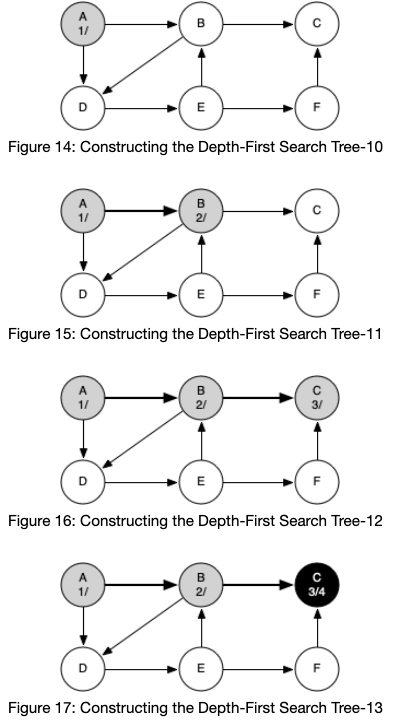

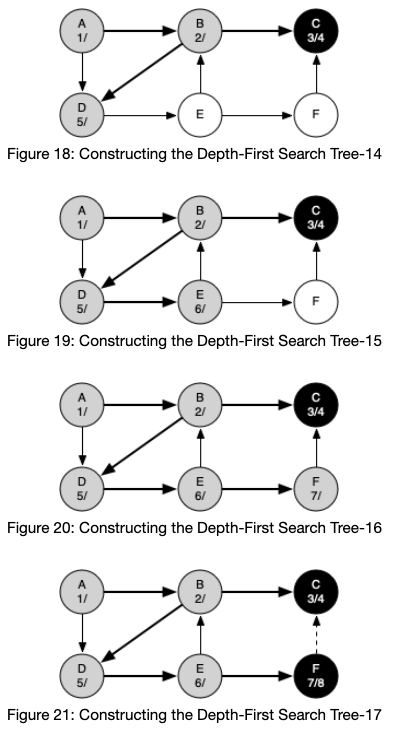

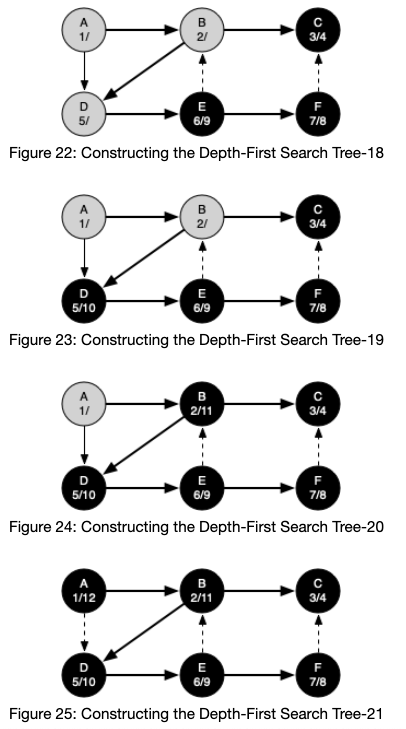

The search begins at vertex A of the graph (Figure 14). Since all of the vertices are white at the beginning of the search the algorithm visits vertex A. The first step in visiting a vertex is to set the color to gray, which indicates that the vertex is being explored, and the discovery time is set to 1. Since vertex A has two adjacent vertices (B, D) each of those need to be visited as well. We’ll make the arbitrary decision that we will visit the adjacent vertices in alphabetical order.

Vertex B is visited next (Figure 15), so its color is set to gray and its discovery time is set to 2. Vertex B is also adjacent to two other nodes (C, D) so we will follow the alphabetical order and visit node C next.

Visiting vertex C (Figure 16) brings us to the end of one branch of the tree. After coloring the node gray and setting its discovery time to 3, the algorithm also determines that there are no adjacent vertices to C. This means that we are done exploring node C and so we can color the vertex black and set the closing time to 4. You can see the state of our search at this point in Figure 17.

Since vertex C is the end of one branch, we now return to vertex B and continue exploring the nodes adjacent to B. The only additional vertex to explore from B is D, so we can now visit D (Figure 18) and continue our search from vertex D. Vertex D quickly leads us to vertex E (Figure 19). Vertex E has two adjacent vertices, B and F. Normally we would explore these adjacent vertices alphabetically, but since B is already colored gray the algorithm recognizes that it should not visit B since doing so would put the algorithm in a loop! So exploration continues with the next vertex in the list, namely F (Figure 20).

Vertex F has only one adjacent vertex, C, but since C is colored black there is nothing else to explore, and the algorithm has reached the end of another branch. From here on, you will see in Figure 21 through Figure 25 that the algorithm works its way back to the first node, setting closing times and coloring vertices black.

The discovery and closing times for each node display a property called the **parenthesis property**. This property means that all the children of a particular node in the depth-first tree have a later discovery time and an earlier closing time than their parent. Figure 26 shows the tree constructed by the depth-first search algorithm.

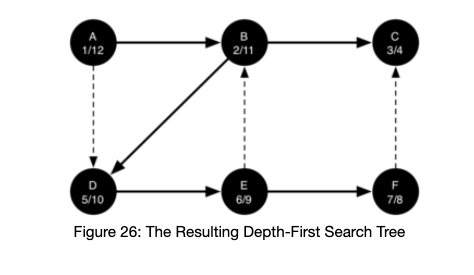

### DSP-7.16:  Depth-First Search Analysis

The general running time for depth-first search is as follows. The loops in `dfs` both run in `O(|V|)`, not counting what happens in `dfs_visit`, since they are executed once for each vertex in the graph. In `dfs_visit` the loop is executed once for each edge in the adjacency list of the current vertex. Since `dfs_visit` is only called recursively if the vertex is white, the loop will execute a maximum of once for every edge in the graph, or `O(|E|)`. Therefore, the total time for depth-first search is `O(|V|+|E|)`.


### DSP-7.17:  Topological Sorting

To demonstrate that computer scientists can turn just about anything into a graph problem, let’s consider the difficult problem of stirring up a batch of pancakes. The recipe is really quite simple: 1 egg, 1 cup of pancake mix, 1 tablespoon oil, and 3/4 cup of milk. To make pancakes you must heat the griddle, mix all the ingredients together, and spoon the mix onto a hot griddle. When the pancakes start to bubble you turn them over and let them cook until they are golden brown on the bottom. Before you eat your pancakes you are going to want to heat up some syrup. Figure 27 illustrates this process as a dependency graph.

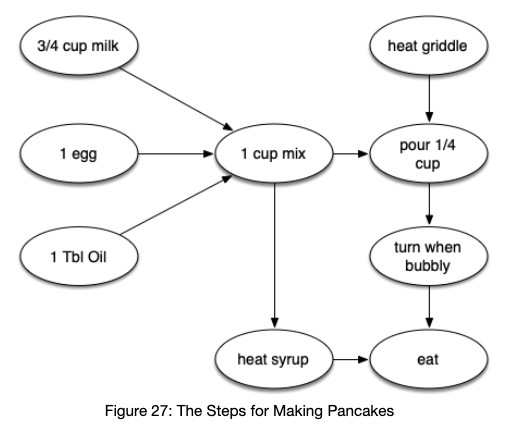

The difficult thing about making pancakes is knowing what to do first. As you can see from Figure 27 you might start by heating the griddle or by adding any of the ingredients to the pancake mix. To help us decide the precise order in which we should do each of the steps required to make our pancakes, we turn to a graph algorithm called the **topological sort**.

A topological sort takes a directed acyclic graph and produces a linear ordering of all its vertices such that if the graph `G` contains an edge `(v,w)` then the vertex `v` comes before the vertex `w` in the ordering. Directed acyclic graphs are used in many applications to indicate the precedence of events. Making pancakes is just one example; other examples include software project schedules, precedence charts for optimizing database queries, and multiplying matrices.

The topological sort is a simple but useful adaptation of a depth-first search. The algorithm for the topological sort is as follows:

1. Call `dfs(g)` for some graph `g`. The main reason we want to call depth-first search is to compute the closing times for each of the vertices.

2. Store the vertices in a list in decreasing order of the closing time.

3. Return the ordered list as the result of the topological sort.

Figure 28 shows the depth-first forest constructed by `dfs` on the pancake-making graph shown in Figure 26.

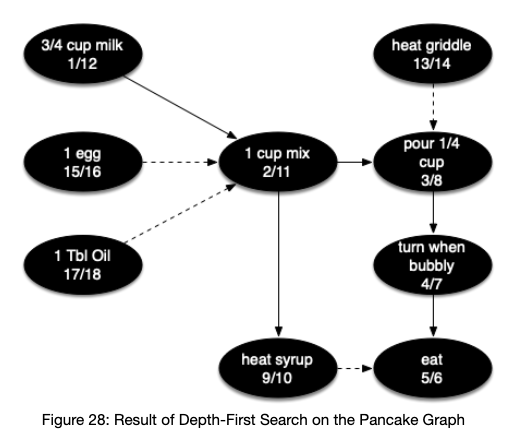

Finally, Figure 29 shows the results of applying the topological sort algorithm to our graph. Now all the ambiguity has been removed and we know exactly the order in which to perform the pancake-making steps.

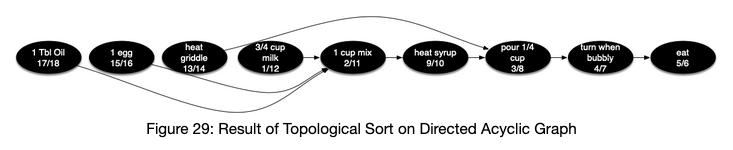

### DSP-7.18:  Strongly Connected Components

For the remainder of this chapter we will turn our attention to some extremely large graphs. The graphs we will use to study some additional algorithms are the graphs produced by the connections between hosts on the internet and the links between web pages. We will begin with web pages.

Search engines like Google and Bing exploit the fact that the pages on the web form a very large directed graph. To transform the World Wide Web into a graph, we will treat a page as a vertex, and the hyperlinks on the page as edges connecting one vertex to another. Figure 30 shows a very small part of the graph produced by following the links from one page to the next, beginning at Luther College’s Computer Science home page. Of course, this graph could be huge, so we have limited it to websites that are no more than 10 links away from the CS home page.

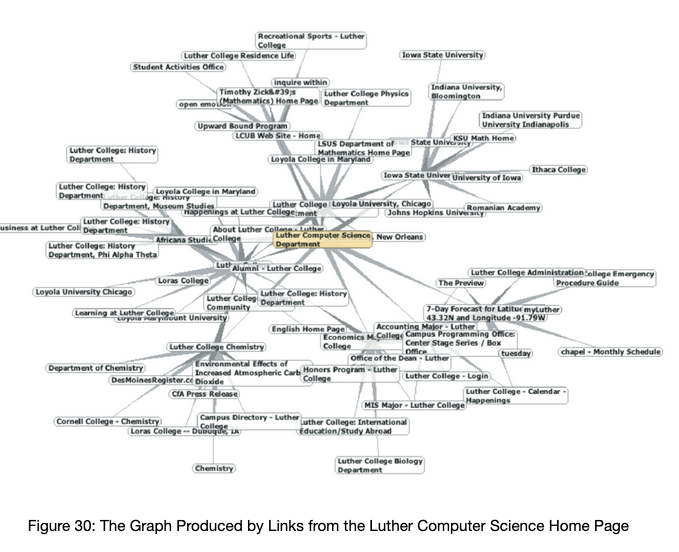

If you study the graph in Figure 30 you might make some interesting observations. First you might notice that many of the other websites on the graph are other Luther College websites. Second, you might notice that there are several links to other colleges in Iowa. Third, you might notice that there are several links to other liberal arts colleges. You might conclude from this that there is some underlying structure to the Web that clusters together websites that are similar on some level.

One graph algorithm that can help find clusters of highly interconnected vertices in a graph is called the **strongly connected components** algorithm, or **SCC**. We formally define a strongly connected component, `C`, of a graph `G`, as the largest subset of vertices `C in V` such that for every pair of vertices `v,w in C` we have a path from `v` to `w` and a path from `w` to `v`. Figure 31 shows a simple graph with three strongly connected components that are identified by the different shaded areas.

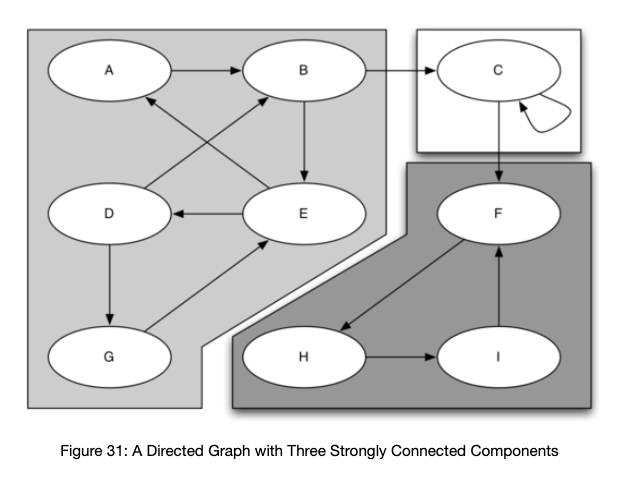

Once the strongly connected components have been identified, we can show a simplified view of the graph by combining all the vertices in one strongly connected component into a single larger vertex. The simplified version of the graph in Figure 31 is shown in Figure 32.

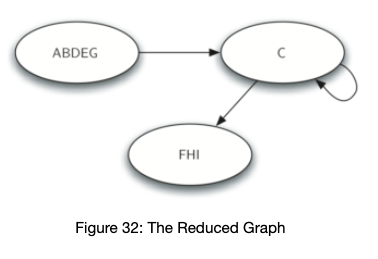

Once again we will see that we can create a very powerful and efficient algorithm by making use of a depth-first search. Before we tackle the main SCC algorithm we must look at one other definition. The **transposition** of a graph `G` is defined as the graph `G^T` where all the edges in the graph have been reversed. That is, if there is a directed edge from node A to node B in the original graph, then `G^T` will contain an edge from node B to node A. Figure 33 and Figure 34 show a simple graph and its transposition.

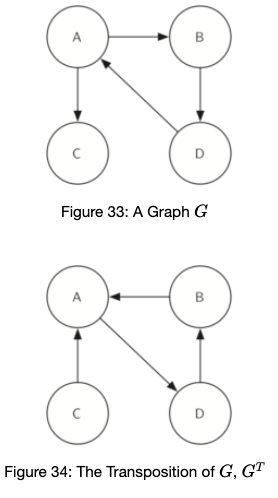

Look at the figures again. Notice that the graph in Figure 33 has two strongly connected components. Now look at Figure 34. Notice that it has the same two strongly connected components.

We can now describe the algorithm to compute the strongly connected components for a graph.

1. Call `dfs` for the graph `G` to compute the closing times for each vertex.

2. Compute `G^T`.

3. Call `dfs` for the graph `G^T` but in the main loop of DFS explore each vertex in decreasing order of closing time.

4. Each tree in the forest computed in step 3 is a strongly connected component. Output the vertex IDs for each vertex in each tree in the forest to identify the component.

Let’s trace the operation of the steps described above on the example graph in Figure 31. Figure 35 shows the starting and closing times computed for the original graph by the DFS algorithm. Figure 36 shows the starting and closing times computed by running DFS on the transposed graph.

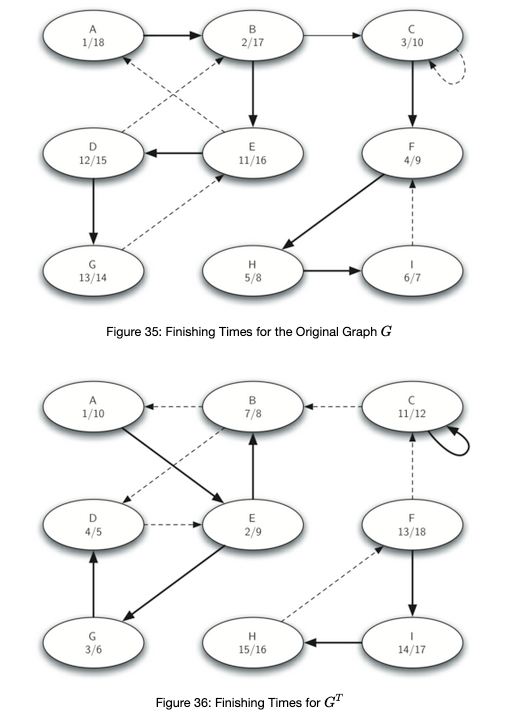

Finally, Figure 37 shows the forest of three trees produced in step 3 of the strongly connected components algorithm. You will notice that we do not provide you with the Python code for the SCC algorithm; we leave writing this program as an exercise.

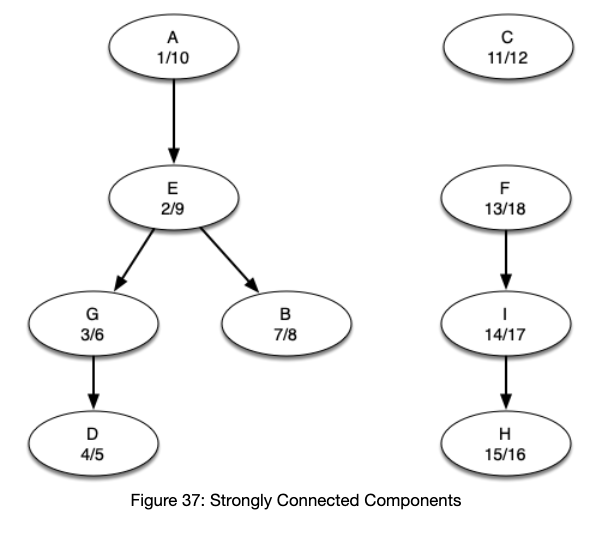

### DSP-7.19:  Shortest Path Problems

When you surf the web, send an email, or log in to a laboratory computer from another location on campus, a lot of work is going on behind the scenes to get the information on your computer transferred to another computer. The in-depth study of how information flows from one computer to another over the internet is the primary topic for a class in computer networking. However, we will talk about how the internet works just enough to understand another very important graph algorithm.

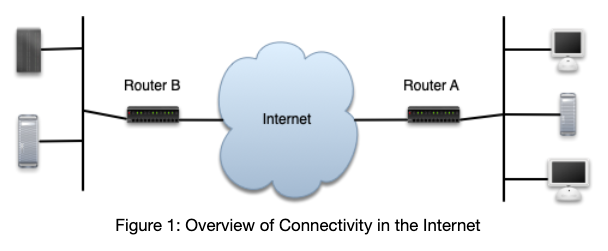

Figure 1 shows you a high-level overview of how communication on the internet works. When you use your browser to request a web page from a server, the request must travel over your local area network and out onto the internet through a router. The request travels over the internet and eventually arrives at a router for the local area network where the server is located. The web page you requested then travels back through the same routers to get to your browser. Inside the cloud labeled “Internet” in Figure 1 are additional routers. The job of all of these routers is to work together to get your information from place to place. You can see there are many routers for yourself if your computer supports the traceroute command. The text below shows the output of the traceroute command, which illustrates that there are 13 routers between the web server at Luther College and the mail server at the University of Minnesota.

Each router on the internet is connected to one or more other routers. If you run the traceroute command at different times of the day, you are likely to see that your information flows through different routers at different times. This is because there is a cost associated with each connection between a pair of routers that depends on the volume of traffic, the time of day, and many other factors. By this time it will not surprise you to learn that we can represent the network of routers as a graph with weighted edges.

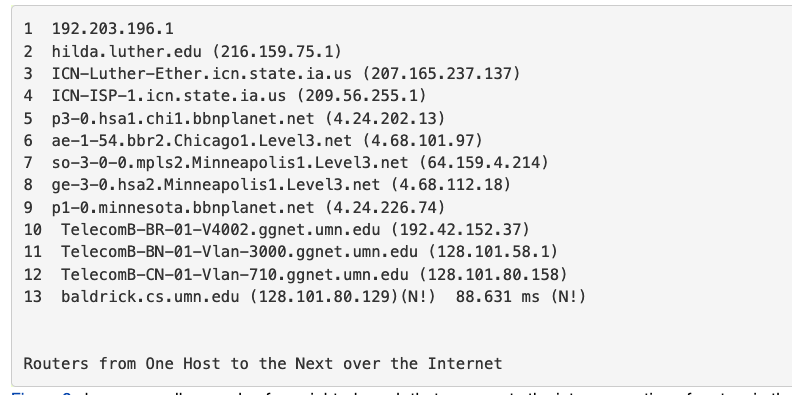

Figure 2 shows a small example of a weighted graph that represents the interconnection of routers in the internet. The problem that we want to solve is to find the shortest path, one with the smallest total weight along which to route any given message. This problem should sound familiar because it is similar to the problem we solved using a breadth-first search, except that here we are concerned with the total weight of the path rather than the number of hops in the path. It should be noted that if all the weights are equal, the problem is the same.

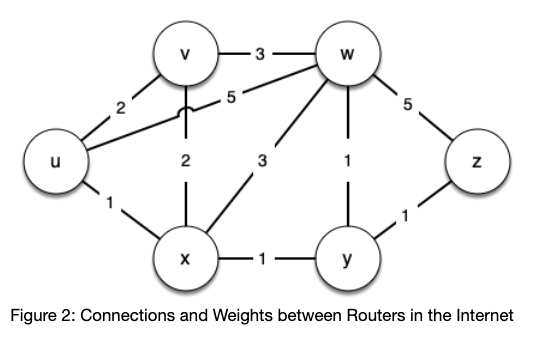

### DSP-7.20:  Dijkstra's Algorithm

The algorithm we are going to use to determine the shortest path is called Dijkstra’s algorithm. Dijkstra’s algorithm is an iterative algorithm that provides us with the shortest path from one particular starting node to all other nodes in the graph. Again this is similar to the results of a breadth-first search.

To keep track of the total cost from the start node to each destination, we will make use of the `distance` instance variable in the `Vertex` class. The `distance` instance variable will contain the current total weight of the smallest weight path from the start to the vertex in question. The algorithm iterates once for every vertex in the graph; however, the order that it iterates over the vertices is controlled by a priority queue. The value that is used to determine the order of the objects in the priority queue is `distance`. When a vertex is first created, `distance` is set to a very large number. Theoretically you would set `distance` to infinity, but in practice we just set it to a number that is larger than any real distance we would have in the problem we are trying to solve.

The code for Dijkstra’s algorithm is shown in Listing 1. When the algorithm finishes, the distances are set correctly as are the predecessor links for each vertex in the graph.

In [15]:
# _dsp_7_20_listing_1.py

from pythonds3.trees import PriorityQueue

def dijkstra(graph, start):
   pq = PriorityQueue()
   start.distance = 0
   pq.heapify([(v.distance, v) for v in graph])
   while pq:
      distance, current_v = pq.delete()
      for next_v in current_v.get_neighbors():
            new_distance = current_v.distance + current_v.get_neighbor(next_v)
            if new_distance < next_v.distance:
               next_v.distance = new_distance
               next_v.previous = current_v
               pq.change_priority(next_v, new_distance)


Dijkstra’s algorithm uses a priority queue. You may recall that a priority queue is based on the heap that we implemented in Chapter 6. There are a couple of differences between that simple implementation and the implementation we use for Dijkstra’s algorithm, however. First, the `PriorityQueue` class stores tuples of `(priority, key)`b pairs. This is an important point, because Dijkstra’s algorithm requires the key in the priority queue to match the key of the vertex in the graph. The priority is used for deciding the position of the key in the priority queue. In this implementation we use the distance to the vertex as the priority because as we will see when we are exploring the next vertex, we always want to explore the vertex that has the smallest distance. The second difference is the addition of the `change_priority` method. As you can see in line 17, this method is used when the distance to a vertex that is already in the queue is reduced, and thus the vertex is moved toward the front of the queue.

Let’s walk through an application of Dijkstra’s algorithm one vertex at a time using the following sequence of figures as our guide. We begin with the vertex `u`. The three vertices adjacent `u` to are `v`,`w` and `x`. Since the initial distances to `v`, `w`and `x` are all initialized to `sys.maxsize`, the new costs to get to them through the start node `x` are all their direct costs. So we update the costs to each of these three nodes. We also set the predecessor for each node to `u` and we add each node to the priority queue. We use the distance as the key for the priority queue. The state of the algorithm is shown in Figure 3.

In the next iteration of the `while` loop we examine the vertices that are adjacent to `x`. The vertex `x` is next because it has the lowest overall cost and therefore bubbled its way to the beginning of the priority queue. At we look at its neighbors `u`, `v`, `w` and `y`. For each neighboring vertex we check to see if the distance to that vertex through `x` is smaller than the previously known distance. Obviously this is the case for `y` since its distance was `sys.maxsize`. It is not the case for `u` or `v` since their distances are 0 and 2 respectively. However, we now learn that the distance to `w` is smaller if we go through `x` than from `u` directly to `w`. Since that is the case we update with a new distance and change the predecessor for `w` from `u` to `x`. See Figure 4 for the state of all the vertices.

The next step is to look at the vertices neighboring `v` (see Figure 5). This step results in no changes to the graph, so we move on to node `y`. At node `y` (see Figure 6) we discover that it is cheaper to get to both `w` and `x`, so we adjust the distances and predecessor links accordingly. Finally we check nodes `w` and `z` (see Figure 6 and Figure 8). However, no additional changes are found and so the priority queue is empty and Dijkstra’s algorithm exits.

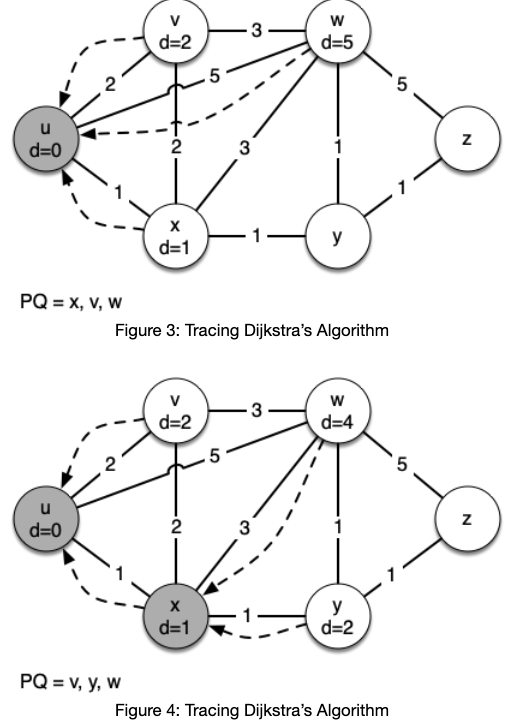

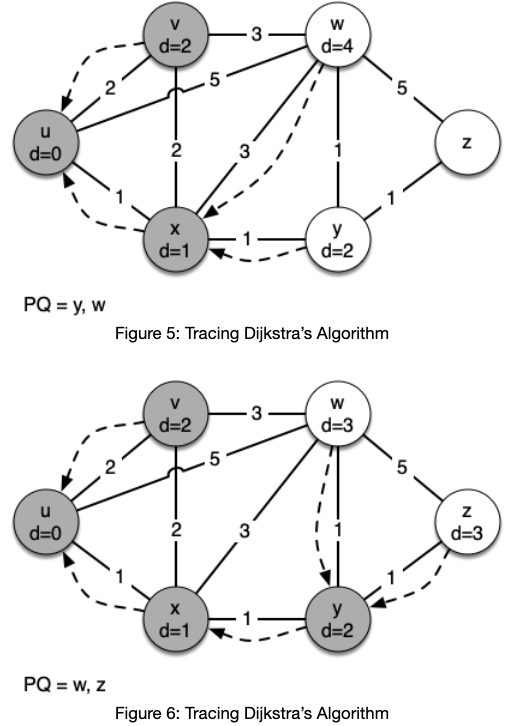

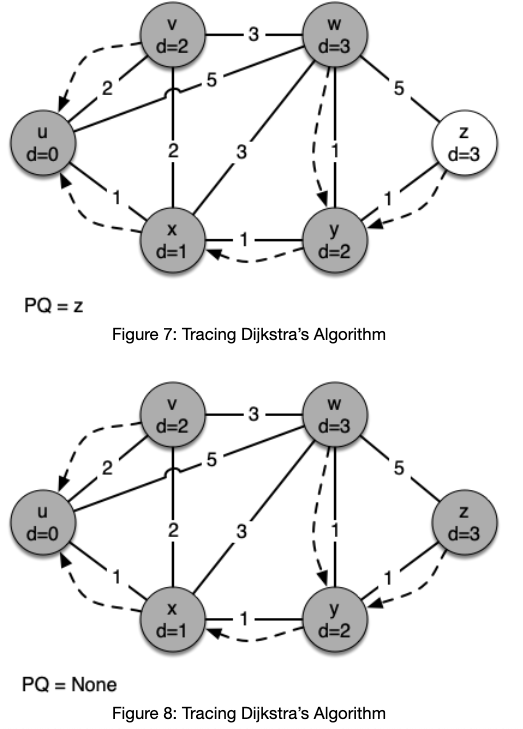

It is important to note that Dijkstra’s algorithm works only when the weights are all positive. You should convince yourself that if you introduced a negative weight on one of the edges of the graph in Figure 2, the algorithm would never exit.

We will note that to route messages through the internet, other algorithms are used for finding the shortest path. One of the problems with using Dijkstra’s algorithm on the internet is that you must have a complete representation of the graph in order for the algorithm to run. The implication of this is that every router has a complete map of all the routers in the internet. In practice this is not the case and other variations of the algorithm allow each router to discover the graph as they go. One such algorithm that you may want to read about is called the distance vector routing algorithm.

### DSP-7.21:  Analysis of Dijkstra's Algorithm

Finally, let’s look at the running time of Dijkstra’s algorithm. We first note that building the priority queue takes `O(|V|)` time since we initially add every vertex in the graph to the priority queue. Once the queue is constructed, the `while` loop is executed once for every vertex since vertices are all added at the beginning and only removed after that. Within that loop each call to `delete` takes `O(log(|V|))` time. Taken together, that part of the loop and the calls to `delete` take `O(|V|*log(|V|)`. The `for` loop is executed once for each edge in the graph, and within the `for` loop the call to `change_priority` takes `O(|E|*log(|V|)`time. So the combined running time is `O((|V|+|E|)*log(|V|)`

### DSP-7.22:  Prim's Spanning Tree Algorithm

For our last graph algorithm let’s consider a problem that online game designers and internet radio providers face. The problem is that they want to efficiently transfer a piece of information to anyone and everyone who may be listening. This is important in gaming so that all the players know the very latest position of every other player. This is important for internet radio so that all the listeners that are tuned in are getting all the data they need to reconstruct the song they are listening to. Figure 9 illustrates the broadcast problem.

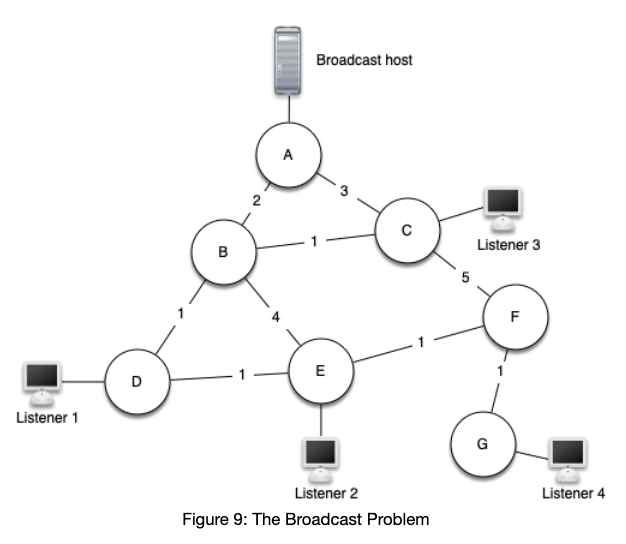

There are some brute force solutions to this problem, so let’s look at them first to help understand the broadcast problem better. This will also help you appreciate the solution that we will propose when we are done. To begin, the broadcast host has some information that the listeners all need to receive. The simplest solution is for the broadcasting host to keep a list of all of the listeners and send individual messages to each. In Figure 9 we show a small network with a broadcaster and some listeners. Using this first approach, four copies of every message would be sent. Assuming that the least cost path is used, let’s see how many times each router would handle the same message.

All messages from the broadcaster go through router A, so A sees all four copies of every message. Router C sees only one copy of each message for its listener. However, routers B and D would see three copies of every message since routers B and D are on the cheapest path for listeners 1, 2, and 4. When you consider that the broadcast host must send hundreds of messages each second for a radio broadcast, that is a lot of extra traffic.

A brute force solution is for the broadcast host to send a single copy of the broadcast message and let the routers sort things out. In this case, the easiest solution is a strategy called **uncontrolled flooding**. The flooding strategy works as follows. Each message starts with a time to live (`TTL`) value set to some number greater than or equal to the number of edges between the broadcast host and its most distant listener. Each router gets a copy of the message and passes the message on to all of its neighboring routers. When the message is passed on the `TTL` is decreased. Because each router continues to send copies of the message to all its neighbors until the TTL value reaches 0, it is easy to convince yourself that uncontrolled flooding generates many more unnecessary messages than our first strategy.

The solution to this problem lies in the construction of a minimum weight spanning tree. Formally we define the minimum spanning tree `T` for a graph `G==(V,E)` as follows. `T` is an acyclic subset of `E` that connects all the vertices in `V`. The sum of the weights of the edges in `T` is minimized.

Figure 10 shows a simplified version of the broadcast graph and highlights the edges that form a minimum spanning tree for the graph. Now to solve our broadcast problem, the broadcast host simply sends a single copy of the broadcast message into the network. Each router forwards the message to any neighbor that is part of the spanning tree, excluding the neighbor that just sent it the message. In this example A forwards the message to B. B forwards the message to D and C. D forwards the message to E, which forwards it to F, which forwards it to G. No router sees more than one copy of any message, and all the listeners that are interested see a copy of the message.

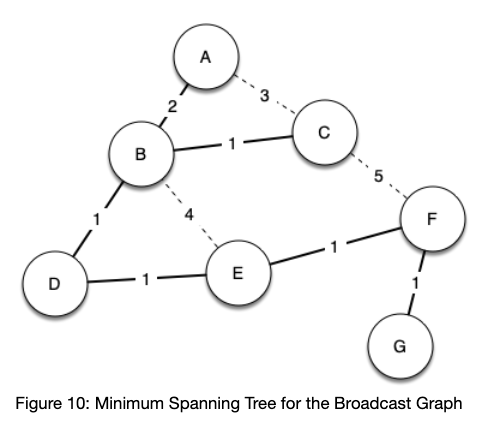

The algorithm we will use to solve this problem is called Prim’s algorithm. Prim’s algorithm belongs to a family of algorithms called the greedy algorithms because at each step it will choose the cheapest next step. In this case the cheapest next step is to follow the edge with the lowest weight.

To develop Prim’s algorithm, let’s first examine the basic idea in constructing a spanning tree as follows:

`While T is not yet a spanning tree
  Find an edge that is safe to add to the tree
  Add the new edge to T
`

The trick is in the step that directs us to “find an edge that is safe.” We define a safe edge as any edge that connects a vertex that is in the spanning tree to a vertex that is not in the spanning tree. This ensures that the tree will always remain a tree and therefore have no cycles.

The Python code to implement Prim’s algorithm is shown in Listing 2. Prim’s algorithm is similar to Dijkstra’s algorithm in that they both use a priority queue to select the next vertex to add to the growing graph.



In [16]:
# _dsp_7_22_listing_2.py

import sys
from pythonds3.trees import PriorityQueue # wrong import in book!


def prim(graph, start):
    pq = PriorityQueue()
    for vertex in graph:
        vertex.distance = sys.maxsize
        vertex.previous = None
    start.distance = 0
    pq.heapify([(vertex.distance, vertex) for vertex in graph])
    while not pq.is_empty():
        distance, current_v = pq.delete()
        for next_v in current_v.get_neighbors():
            new_distance = current_v.get_neighbor(next_v)
            if next_v in pq and new_distance < next_v.distance:
                next_v.previous = current_v
                next_v.distance = new_distance
                pq.change_priority(next_v, new_distance)


The following sequence of figures (Figure 11 through Figure 17) shows the algorithm in operation on our sample tree. We begin with the starting vertex as A. The distances to all the other vertices are initialized to infinity. Looking at the neighbors of A we can update distances to two of the additional vertices, B and C, because the distances to B and C through A are less than infinite. This moves B and C to the front of the priority queue. Update the predecessor links for B and C by setting them to point to A. It is important to note that we have not formally added B or C to the spanning tree yet. A node is not considered to be part of the spanning tree until it is removed from the priority queue.

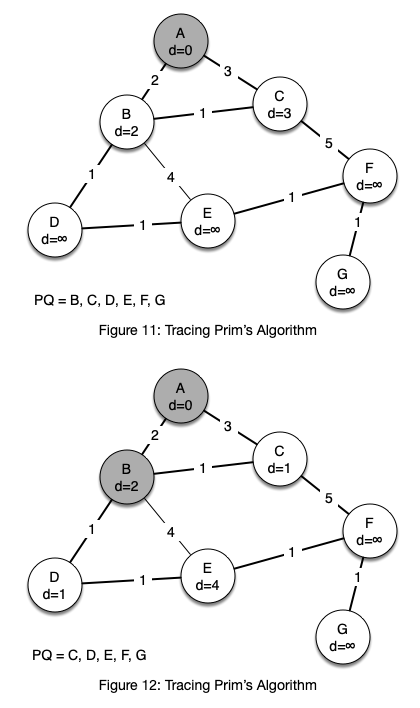

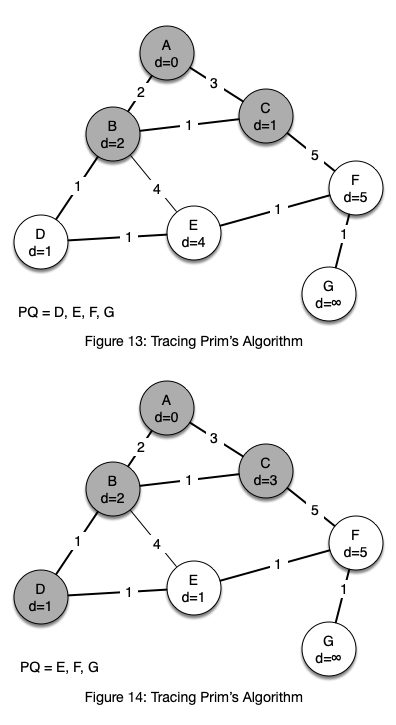

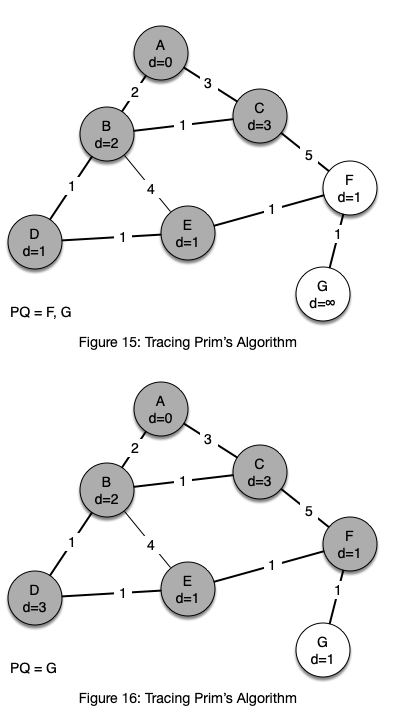

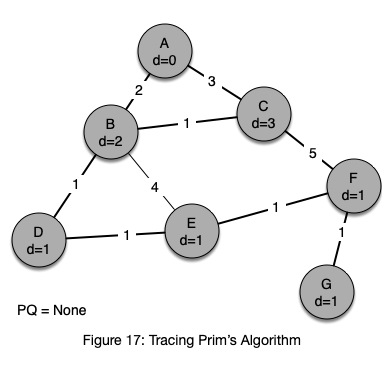

Since B has the smallest distance we look at B next. Examining B’s neighbors we see that D and E can be updated. Both D and E get new distance values and their predecessor links are updated. Moving on to the next node in the priority queue we find C. The only node that C is adjacent to that is still in the priority queue is F; thus we can update the distance to F and adjust F’s position in the priority queue.

Now we examine the vertices adjacent to node D. We find that we can update E and reduce the distance to E from 6 to 4. When we do this we change the predecessor link on E to point back to D, thus preparing it to be grafted into the spanning tree but in a different location. The rest of the algorithm proceeds as you would expect, adding each new node to the tree.

### DSP-7.23:  Summary

In this chapter we have looked at the graph abstract data type and some implementations of a graph. A graph enables us to solve many problems— provided we can transform the original problem into something that can be represented by a graph. In particular, we have seen that graphs are useful to solve problems in the following general areas:

- Breadth-first search for finding the unweighted shortest path.

- Dijkstra’s algorithm for the weighted shortest path.

- Depth-first search for graph exploration.

- Strongly connected components for simplifying a graph.

- Topological sort for ordering tasks.

- Minimum weight spanning trees for broadcasting messages.

### DSP-7.24:  Key Terms

- acyclic graph

- edge

- adjacency list
	
- edge cost

- adjacency matrix
	
- graph

- adjacent	

- parenthesis property

- breadth-first forest
	
- path

- breadth-first search (BFS)
	
- shortest path

- cycle
	
- spanning tree

- depth-first forest
	
- strongly connected components (SCC)

- depth-first search (DFS)
	
- topological sort

- digraph

- uncontrolled flooding

- directed acyclic graph (DAG)
	
- vertex

- directed graph

- weight

### DSP-7.25:  Exercises

1. Draw the graph corresponding to the following adjacency matrix.

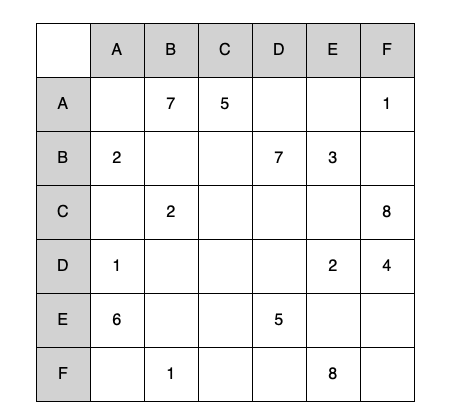

2. (1. in book) Draw the graph corresponding to the following list of edges.

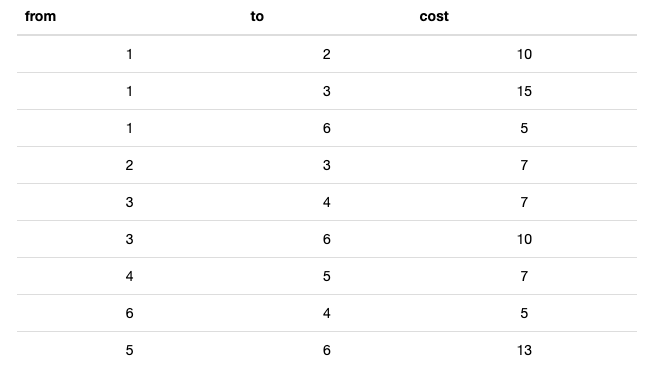

3. (2. in book) Ignoring the weights, perform a breadth-first search on the graph drawn for question 1 or 2.

In [ ]:
# your code here


4. (1. in book) What is the Big-O running time of the build_graph function?

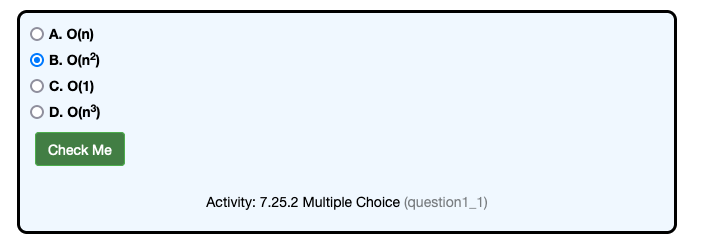

5. (1. in book) Derive the Big-O running time for the topological sort algorithm.

6. (1. in book) Derive the Big-O running time for the strongly connected components algorithm.

7. (2. in book) Show each step in applying Dijkstra’s algorithm to the graph drawn for question 1 or 2.

8. Using Prim’s algorithm, find the minimum weight spanning tree for the graph drawn for question 1 or 2.

In [12]:
# your code here

9. (1. in book) Draw a dependency graph illustrating the steps needed to send an email. Perform a topological sort on your graph.

10. (2. in book) Express branching factor `k` as a function of the board size `n`.

11. (3. in book) Derive an expression for the base of the exponent used in expressing the running time of the knights tour.

12. Explain why the general DFS algorithm is not suitable for solving the knight’s tour problem.

13. (1. in book) What is the Big-O running time for Prim’s minimum spanning tree algorithm?

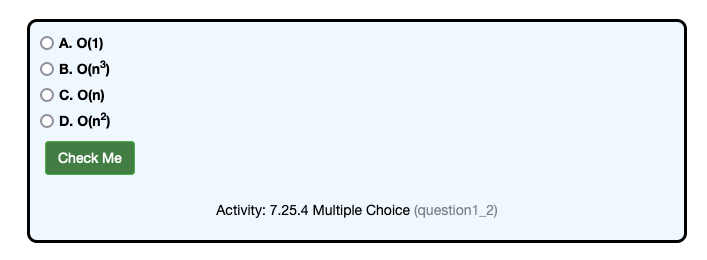

14. (2. in book) Modify the depth-first search function to produce a topological sort.

15. (3. in book) Modify the depth-first search to produce strongly connected components.

16. (4. in book) Write the `transpose` method for the `Graph` class.

17. (5. in book) Using breadth-first search write an algorithm that can determine the shortest path from each vertex to every other vertex. This is called the “all pairs shortest path problem.”

18. (6. in book) Using breadth-first search revise the maze program from the Chapter 4 (Recursion) to find the shortest path out of a maze.

19. (7. in book) Write a program to solve the following problem: you have two jugs, a 4-gallon and a 3-gallon. Neither of the jugs has any markings. There is a pump that can be used to fill the jugs with water. How can you get exactly two gallons of water in the 4-gallon jug?

20. (8. in book) Generalize the problem above so that the parameters to your solution include the size of each jug and the final amount of water to be left in the larger jug.

21. (9. in book) Write a program that solves the following problem: three missionaries and three cannibals come to a river and find a boat that holds two people. Everyone must get across the river to continue on the journey. However, if the cannibals ever outnumber the missionaries on either bank, the missionaries will be eaten. Find a series of crossings that will get everyone safely to the other side of the river.